# (study) 파이썬 입문 (13주차) 5월23일
> 클래스 공부 6단계

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Python, class, 사용자정의함수]

## 강의영상

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-xw_UHDXp5ZpYywkCxpN4SE

`-` (1/4) 인사관리 예제 (1)

`-` (2/4) 인사관리 예제 (2)

`-` (3/4) 리스트의 상속 

`-` (4/4) 사용자정의 자료형의 유용함

## 클래스공부 6단계 

`-` 상속 

### 인사관리 예제 

`-` 아래와 같은 클래스를 만들자. 
- 이름, 직급, 연봉에 대한 정보가 있다.
- 연봉을 올려주는 메소드가 존재함. 

In [1]:
class Employee:
    def __init__(self,name,position=None,pay=0):
        self.name = name
        self.position = position
        self.pay = pay 
    def _repr_html_(self):
        html_str = """
        이름: {} <br/>
        직급: {} <br/>
        연봉: {} <br/>
        """.format(self.name,self.position,self.pay)
        return html_str
    def giveraise(self,pct): 
        self.pay = self.pay * (1+pct) 

`-` 확인

In [2]:
iu=Employee('iu',position='staff',pay=5000)
hynn=Employee('hynn',position='staff',pay=4000)
hd=Employee('hodong',position='mgr',pay=8000)

In [3]:
iu

In [4]:
iu.giveraise(0.1)
iu

In [5]:
hynn.giveraise(0.2)
hynn

`-` 회사의 모든 직원의 연봉을 10%씩 올려보자. 

In [6]:
iu=Employee('iu',position='staff',pay=5000)
hynn=Employee('hynn',position='staff',pay=4000)
hd=Employee('hodong',position='mgr',pay=8000)

In [7]:
for i in [iu, hynn, hd]:
    i.giveraise(0.1) 

In [8]:
iu

In [9]:
hynn

In [10]:
hd

`-` 매니저직급은 일반직원들의 상승분에서 5%의 보너스가 추가되어 상승한다고 가정하고 모든 직원의 연봉을 10%씩 올리는 코드를 구현해보자. 

(구현1)

In [11]:
iu=Employee('iu',position='staff',pay=5000)
hynn=Employee('hynn',position='staff',pay=4000)
hd=Employee('hodong',position='mgr',pay=8000)

In [12]:
for i in [iu,hynn,hd]: 
    if i.position == 'mgr':
        i.giveraise(0.1 + 0.05) 
    else: 
        i.giveraise(0.1) 

In [13]:
iu

In [14]:
hynn

In [15]:
hd

(구현2) 새로운 클래스를 만들자 

In [16]:
class Manager: 
    def __init__(self,name,position=None,pay=0):
        self.name = name
        self.position = position
        self.pay = pay 
    def _repr_html_(self):
        html_str = """
        이름: {} <br/>
        직급: {} <br/>
        연봉: {} <br/>
        """.format(self.name,self.position,self.pay)
        return html_str
    def giveraise(self,pct): 
        self.pay = self.pay * (1+pct+0.05)     

In [17]:
iu=Employee('iu',position='staff',pay=5000)
hynn=Employee('hynn',position='staff',pay=4000)
hd=Manager('hodong',position='mgr',pay=8000)

In [18]:
for i in [iu,hynn,hd]: 
    i.giveraise(0.1) 

In [19]:
iu

In [20]:
hynn

In [21]:
hd

(구현3) 상속이용!

In [22]:
class Manager(Employee): 
    def giveraise(self,pct): 
        self.pay = self.pay * (1+pct+0.05)     

In [23]:
iu=Employee('iu',position='staff',pay=5000)
hynn=Employee('hynn',position='staff',pay=4000)
hd=Manager('hodong',position='mgr',pay=8000)

In [24]:
for i in [iu,hynn,hd]:
    i.giveraise(0.1) 

In [25]:
iu

In [26]:
hynn

In [27]:
hd

`-` 요약: 이미 만들어진 클래스에서 대부분의 기능은 그대로 쓰지만 일부기능만 변경 혹은 추가하고 싶다면 클래스를 상속하면 된다!

### 리스트의 상속

- ref: http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&barcode=9791165213190

`-` list와 비슷한데 멤버들의 빈도가 계산되는 메소드를 포함하는 새로운 나만의 list를 만들고 싶다. 

In [28]:
lst = ['a','b','a','c','b','a','d']
lst

['a', 'b', 'a', 'c', 'b', 'a', 'd']

`-` 아래와 같은 딕셔너리를 만들고 싶다. 

In [29]:
freq = {'a':3, 'b':2, 'c':1, 'd':1} 
freq

{'a': 3, 'b': 2, 'c': 1, 'd': 1}

- `lst.frequency()`를 입력하면 위의 기능이 수행되도록 변형된 list를 쓰고 싶다. 

`-` 구현

(시도1) 반쯤 성공? 

In [30]:
lst

['a', 'b', 'a', 'c', 'b', 'a', 'd']

In [31]:
freq = {'a':0, 'b':0, 'c':0, 'd':0} 
freq

{'a': 0, 'b': 0, 'c': 0, 'd': 0}

In [32]:
for item in lst:
    freq[item] = freq[item] + 1 

In [33]:
freq

{'a': 3, 'b': 2, 'c': 1, 'd': 1}

(시도2) 실패

In [35]:
lst

['a', 'b', 'a', 'c', 'b', 'a', 'd']

In [36]:
freq = dict()
freq

{}

In [37]:
for item in lst:
    freq[item] = freq[item] + 1 

KeyError: 'a'

에러이유? `freq['a']`를 호출할 수 없다 -> freq.get('a',0) 이용

In [38]:
freq['a']

KeyError: 'a'

In [39]:
freq.get?

Signature: freq.get(key, default=None, /)
Docstring: Return the value for key if key is in the dictionary, else default.
Type:      builtin_function_or_method


- key에 대응하는 값이 있으면 그 값을 리턴하고 없으면 default를 리턴 

In [40]:
freq.get('a') # freq['a']에 해당하는 자료가 없어도 에러가 나지 않음 

In [41]:
freq.get('a',0) # freq['a']에 해당하는 자료가 없어도 에러가 나지 않음 + freq['a']에 해당하는 자료가 없으면 0을 리턴

0

(시도3)

In [42]:
lst

['a', 'b', 'a', 'c', 'b', 'a', 'd']

In [43]:
freq = dict()
freq

{}

In [44]:
for item in lst:
    freq[item] = freq.get(item,0) + 1 

In [45]:
freq

{'a': 3, 'b': 2, 'c': 1, 'd': 1}

`-` 이것을 내가 정의하는 새로운 list의 메소드로 넣고 싶다. 

In [46]:
class L(list): 
    def frequency(self):
        freq = dict()
        for item in self:
            freq[item] = freq.get(item,0) + 1 
        return freq 

In [47]:
lst = L([1,1,1,2,2,3])

In [48]:
lst # 원래 list에 있는 repr 기능을 상속받아서 이루어지는 결과

[1, 1, 1, 2, 2, 3]

In [50]:
lst?

Type:            L
String form:     [1, 1, 1, 2, 2, 3]
Length:          6
Docstring:       <no docstring>
Class docstring:
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [51]:
_lst = L([4,5,6])
lst + _lst # L자료형끼리의 덧셈

[1, 1, 1, 2, 2, 3, 4, 5, 6]

In [52]:
lst + [4,5,6] # L자료형과 list자료형의 덧셈도 가능

[1, 1, 1, 2, 2, 3, 4, 5, 6]

- L자료형의 덧셈은 list의 덧셈과 완전히 같음 

In [53]:
lst.append(10) # append함수도 그대로 쓸 수 있음
lst

[1, 1, 1, 2, 2, 3, 10]

`-` 기존리스트에서 추가로 frequency() 메소드가 존재함. 

In [54]:
lst.frequency()

{1: 3, 2: 2, 3: 1, 10: 1}

## Appendix: 사용자정의 자료형의 유용함

`-` 사용자정의 자료형이 어떤 경우에는 유용할 수 있다. 

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

`-` 예제1

In [56]:
year = ['2016','2017','2017','2017',2017,2018,2018,2019,2019] 
value = np.random.randn(9)

In [57]:
df= pd.DataFrame({'year':year,'value':value})
df

,year,value
0,2016,-2.302688
1,2017,2.472312
2,2017,-0.026192
3,2017,-0.264954
4,2017,0.312092
5,2018,0.487921
6,2018,-0.372992
7,2019,-0.783505
8,2019,0.434551


TypeError: 'value' must be an instance of str or bytes, not a int

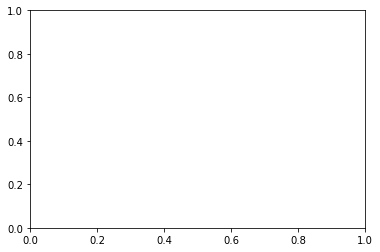

In [58]:
plt.plot(df.year,df.value)

에러의 이유: df.year에 str, int가 동시에 있음

In [59]:
np.array(df.year)

array(['2016', '2017', '2017', '2017', 2017, 2018, 2018, 2019, 2019],
      dtype=object)

자료형을 바꿔주면 해결할 수 있다. 

In [60]:
np.array(df.year, dtype=np.float64)
#np.array(df.year).astype(np.float64)
#df.year.astype(np.float64)

array([2016., 2017., 2017., 2017., 2017., 2018., 2018., 2019., 2019.])

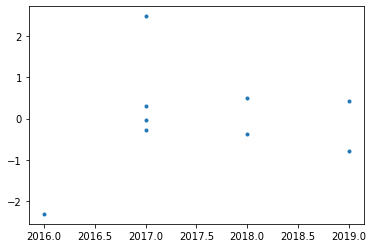

In [61]:
plt.plot(df.year.astype(np.float64),df.value,'.')

`-` 예제2

In [62]:
year = ['2016','2017','2017','2017년','2017년',2018,2018,2019,2019] 
value = np.random.randn(9)

In [63]:
df= pd.DataFrame({'year':year,'value':value})
df

,year,value
0,2016,-0.678625
1,2017,-0.878156
2,2017,0.432160
3,2017년,0.519398
4,2017년,0.640570
5,2018,-0.904019
6,2018,1.148045
7,2019,-0.594485
8,2019,-1.015366


In [64]:
np.array(df.year,dtype=np.float64) # 타입을 일괄적으로 바꾸기 어렵다. 

ValueError: could not convert string to float: '2017년'

In [65]:
L(df.year).frequency()

{'2016': 1, '2017': 2, '2017년': 2, 2018: 2, 2019: 2}

- '2016'와 같은 형태, '2017년'와 같은 형태, 숫자형이 혼합 -> 맞춤형 변환이 필요함

In [66]:
'2017년'.replace("년","")

'2017'

In [67]:
L(df.year)

['2016', '2017', '2017', '2017년', '2017년', 2018, 2018, 2019, 2019]

In [70]:
def f(a): ## 사실 데이터의 구조를 모르면 이런 함수를 짤 수 없음 --> 자료의 구조를 확인해준다는 의미에서 freq가 있다면 편리하다. 
    if type(a) is str: 
        if "년" in a:
            return int(a.replace("년",""))
        else: 
            return int(a) 
    else: 
        return a 

In [71]:
[f(a) for a in df.year]

[2016, 2017, 2017, 2017, 2017, 2018, 2018, 2019, 2019]

In [72]:
df.year= [f(a) for a in df.year]

In [73]:
df

,year,value
0,2016,-0.678625
1,2017,-0.878156
2,2017,0.432160
3,2017,0.519398
4,2017,0.640570
5,2018,-0.904019
6,2018,1.148045
7,2019,-0.594485
8,2019,-1.015366


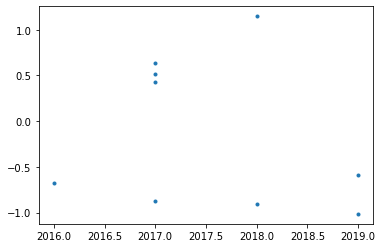

In [74]:
plt.plot(df.year, df.value, '.')